In [25]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
y = np.repeat([0,1], [3, 6])

In [16]:
with pm.Model() as model:
    
    model_index = pm.DiscreteUniform('model_index', lower=0, upper=1)
    
    kappa_theta = 12
    
    mu_theta = pm.math.switch(pm.math.eq(model_index, 1), 0.25, 0.75)
    
    a_theta = mu_theta * kappa_theta
    
    b_theta = (1-mu_theta) * kappa_theta
    
    theta = pm.Beta('theta', a_theta, b_theta)
    
    y = pm.Bernoulli('y', theta, observed=y)
    
    trace = pm.sample(5000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [model_index]
>NUTS: [theta]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:03<00:00, 5899.38draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf51dd8>,
      dtype=object)

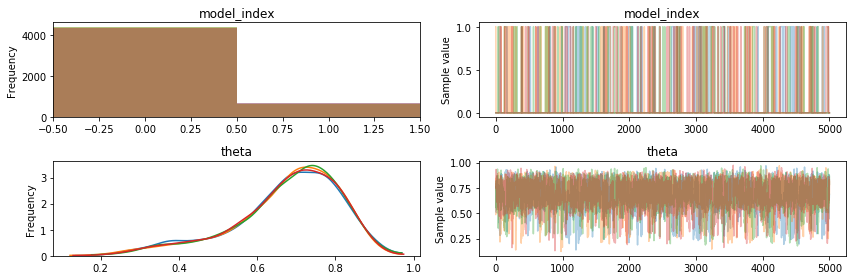

In [17]:
pm.traceplot(trace)

In [18]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
model_index,0.13095,0.337346,0.009879,0.000000,1.000000,1085.522478,1.000130
theta,0.67695,0.137467,0.003227,0.361292,0.894402,1673.836577,1.000047


In [22]:
model_idx_sample = trace['model_index']

In [19]:
theta_sample = trace['theta']

In [24]:
theta_m1_sample = theta_sample[model_idx_sample == 1]
theta_m2_sample = theta_sample[model_idx_sample == 0]

In [41]:
p_m1 = sum(theta_m1_sample/len(model_idx_sample))
p_m2 = 1 - p_m1

In [31]:
theta_models_df = pd.DataFrame([theta_m1_sample, theta_m2_sample]).T

AttributeError: 'numpy.float64' object has no attribute 'pop'

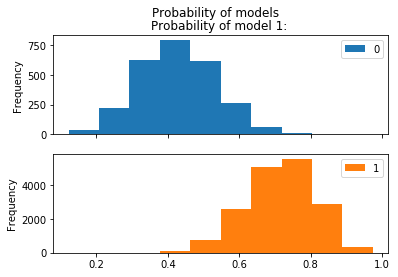

In [49]:
[ax1, ax2] = theta_models_df.plot.hist(subplots=True, title='Probability of models')
ax1.set_title("Probability of model 1: ", p_m1)
ax2.set_title("Probability of model 2: ", p_m2)